<a href="https://colab.research.google.com/github/vinicius-mattoso/Maintenance_study/blob/main/Old_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detecção de falhas em equipamentos

## 0 - Dataset

In [1]:
# Se necessário: pip install kagglehub
# !pip install -q kagglehub

import os
import kagglehub

# Baixa a versão mais recente do dataset
# Dataset: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
path = kagglehub.dataset_download("nphantawee/pump-sensor-data")
print("Path to dataset files:", path)

# Em geral o arquivo é 'sensor.csv'. Ajuste se o nome divergir (liste os arquivos para conferir).
print("Files:", os.listdir(path))

import pandas as pd
csv_path = os.path.join(path, "sensor.csv")  # ajuste se precisar
df = pd.read_csv(csv_path)
df.head()


Path to dataset files: /kaggle/input/pump-sensor-data
Files: ['sensor.csv']


Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_50  sensor_51  machine_status  
0   243.0556   201.3889          NORMAL  
1   243.0556   201.3889          NORMAL  
2   241.3194   203.7037          NORMAL  
3   240.4514   203.1250          NORMAL  
4   242.1875   201.3889          NORMAL  

[5 rows x 55 columns]

## 1 - EDA e pré-processamento

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 56 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        220320 non-null  int64         
 1   timestamp         220320 non-null  datetime64[ns]
 2   sensor_00         210112 non-null  float64       
 3   sensor_01         219951 non-null  float64       
 4   sensor_02         220301 non-null  float64       
 5   sensor_03         220301 non-null  float64       
 6   sensor_04         220301 non-null  float64       
 7   sensor_05         220301 non-null  float64       
 8   sensor_06         215522 non-null  float64       
 9   sensor_07         214869 non-null  float64       
 10  sensor_08         215213 non-null  float64       
 11  sensor_09         215725 non-null  float64       
 12  sensor_10         220301 non-null  float64       
 13  sensor_11         220301 non-null  float64       
 14  sens

In [10]:
df.describe()

Unnamed: 0                      timestamp      sensor_00  \
count  220320.000000                         220320  210112.000000   
mean   110159.500000  2018-06-16 11:59:29.999999488       2.372221   
min         0.000000            2018-04-01 00:00:00       0.000000   
25%     55079.750000            2018-05-09 05:59:45       2.438831   
50%    110159.500000            2018-06-16 11:59:30       2.456539   
75%    165239.250000            2018-07-24 17:59:15       2.499826   
max    220319.000000            2018-08-31 23:59:00       2.549016   
std     63601.049991                            NaN       0.412227   

           sensor_01      sensor_02      sensor_03      sensor_04  \
count  219951.000000  220301.000000  220301.000000  220301.000000   
mean       47.591611      50.867392      43.752481     590.673936   
min         0.000000      33.159720      31.640620       2.798032   
25%        46.310760      50.390620      42.838539     626.620400   
50%        48.133678      51.649300      44.227428     632.638916   
75%        49.479160      52.777770      45.312500     637.615723   
max        56.727430      56.032990      48.220490     800.000000   
std         3.296666       3.666820       2.418887     144.023912   

           sensor_05      sensor_06      sensor_07  ...      sensor_43  \
count  220301.000000  215522.000000  214869.000000  ...  220293.000000   
mean       73.396414      13.501537      15.843152  ...      43.879591   
min         0.000000       0.014468       0.000000  ...      24.479166   
25%        69.976260      13.346350      15.907120  ...      39.583330   
50%        75.576790      13.642940      16.167530  ...      42.968750   
75%        80.912150      14.539930      16.427950  ...      46.614580   
max        99.999880      22.251160      23.596640  ...     408.593700   
std        17.298247       2.163736       2.201155  ...      11.044404   

           sensor_44      sensor_45      sensor_46      sensor_47  \
count  220293.000000  220293.000000  220293.000000  220293.000000   
mean       42.656877      43.094984      48.018585      44.340903   
min        25.752316      26.331018      26.331018      27.199070   
25%        36.747684      36.747684      40.509258      39.062500   
50%        40.509260      40.219910      44.849540      42.534720   
75%        45.138890      44.849540      51.215280      46.585650   
max      1000.000000     320.312500     370.370400     303.530100   
std        11.576355      12.837520      15.641284      10.442437   

           sensor_48      sensor_49      sensor_50      sensor_51  \
count  220293.000000  220293.000000  143303.000000  204937.000000   
mean      150.889044      57.119968     183.049260     202.699667   
min        26.331018      26.620370      27.488426      27.777779   
25%        83.912030      47.743060     167.534700     179.108800   
50%       138.020800      52.662040     193.865700     197.338000   
75%       208.333300      60.763890     219.907400     216.724500   
max       561.632000     464.409700    1000.000000    1000.000000   
std        82.244957      19.143598      65.258650     109.588607   

       _target_abnormal  
count     220320.000000  
mean           0.065741  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  
std            0.247829  

[8 rows x 55 columns]

[Shape] (220320, 55)

[Nulls]
 sensor_15    220320
sensor_50     77017
sensor_51     15383
sensor_00     10208
sensor_07      5451
sensor_08      5107
sensor_06      4798
sensor_09      4595
sensor_01       369
sensor_30       261
dtype: int64

[Cols]
 ['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status']

[Timestamp col] timestam

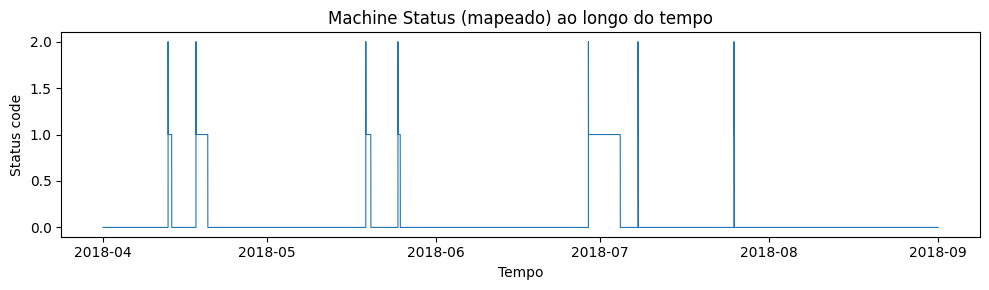

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns', 120)

print("[Shape]", df.shape)
print("\n[Nulls]\n", df.isna().sum().sort_values(ascending=False).head(10))
print("\n[Cols]\n", df.columns.tolist())

# Identifica timestamp e label
ts_col = None
for c in ['timestamp','time','datetime']:
    if c in df.columns:
        ts_col = c; break

label_col = None
for c in ['machine_status','status','label','target']:
    if c in df.columns:
        label_col = c; break

print("\n[Timestamp col]", ts_col)
print("[Label col]", label_col)

# Padroniza timestamp e ordena
if ts_col:
    df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
    df = df.sort_values(ts_col).reset_index(drop=True)

# Cria alvo binário: NORMAL=0 vs {RECOVERING,BROKEN}=1
if label_col is None:
    raise ValueError("Não encontrei coluna de rótulo. Esperado 'machine_status' ou similar.")
df['_target_abnormal'] = np.where(df[label_col].astype(str).str.upper().isin(['BROKEN','RECOVERING']), 1, 0)

print("\n[Distribuição de rótulos originais]\n", df[label_col].value_counts(dropna=False))
print("\n[Distribuição alvo binário]\n", df['_target_abnormal'].value_counts())

# Visual quicklook do status no tempo
if ts_col and label_col:
    status_map = {'NORMAL':0, 'RECOVERING':1, 'BROKEN':2}
    y_plot = df[label_col].map(status_map).fillna(-1)
    plt.figure(figsize=(10,3))
    plt.plot(df[ts_col], y_plot, linewidth=0.8)
    plt.title('Machine Status (mapeado) ao longo do tempo')
    plt.xlabel('Tempo'); plt.ylabel('Status code')
    plt.tight_layout(); plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

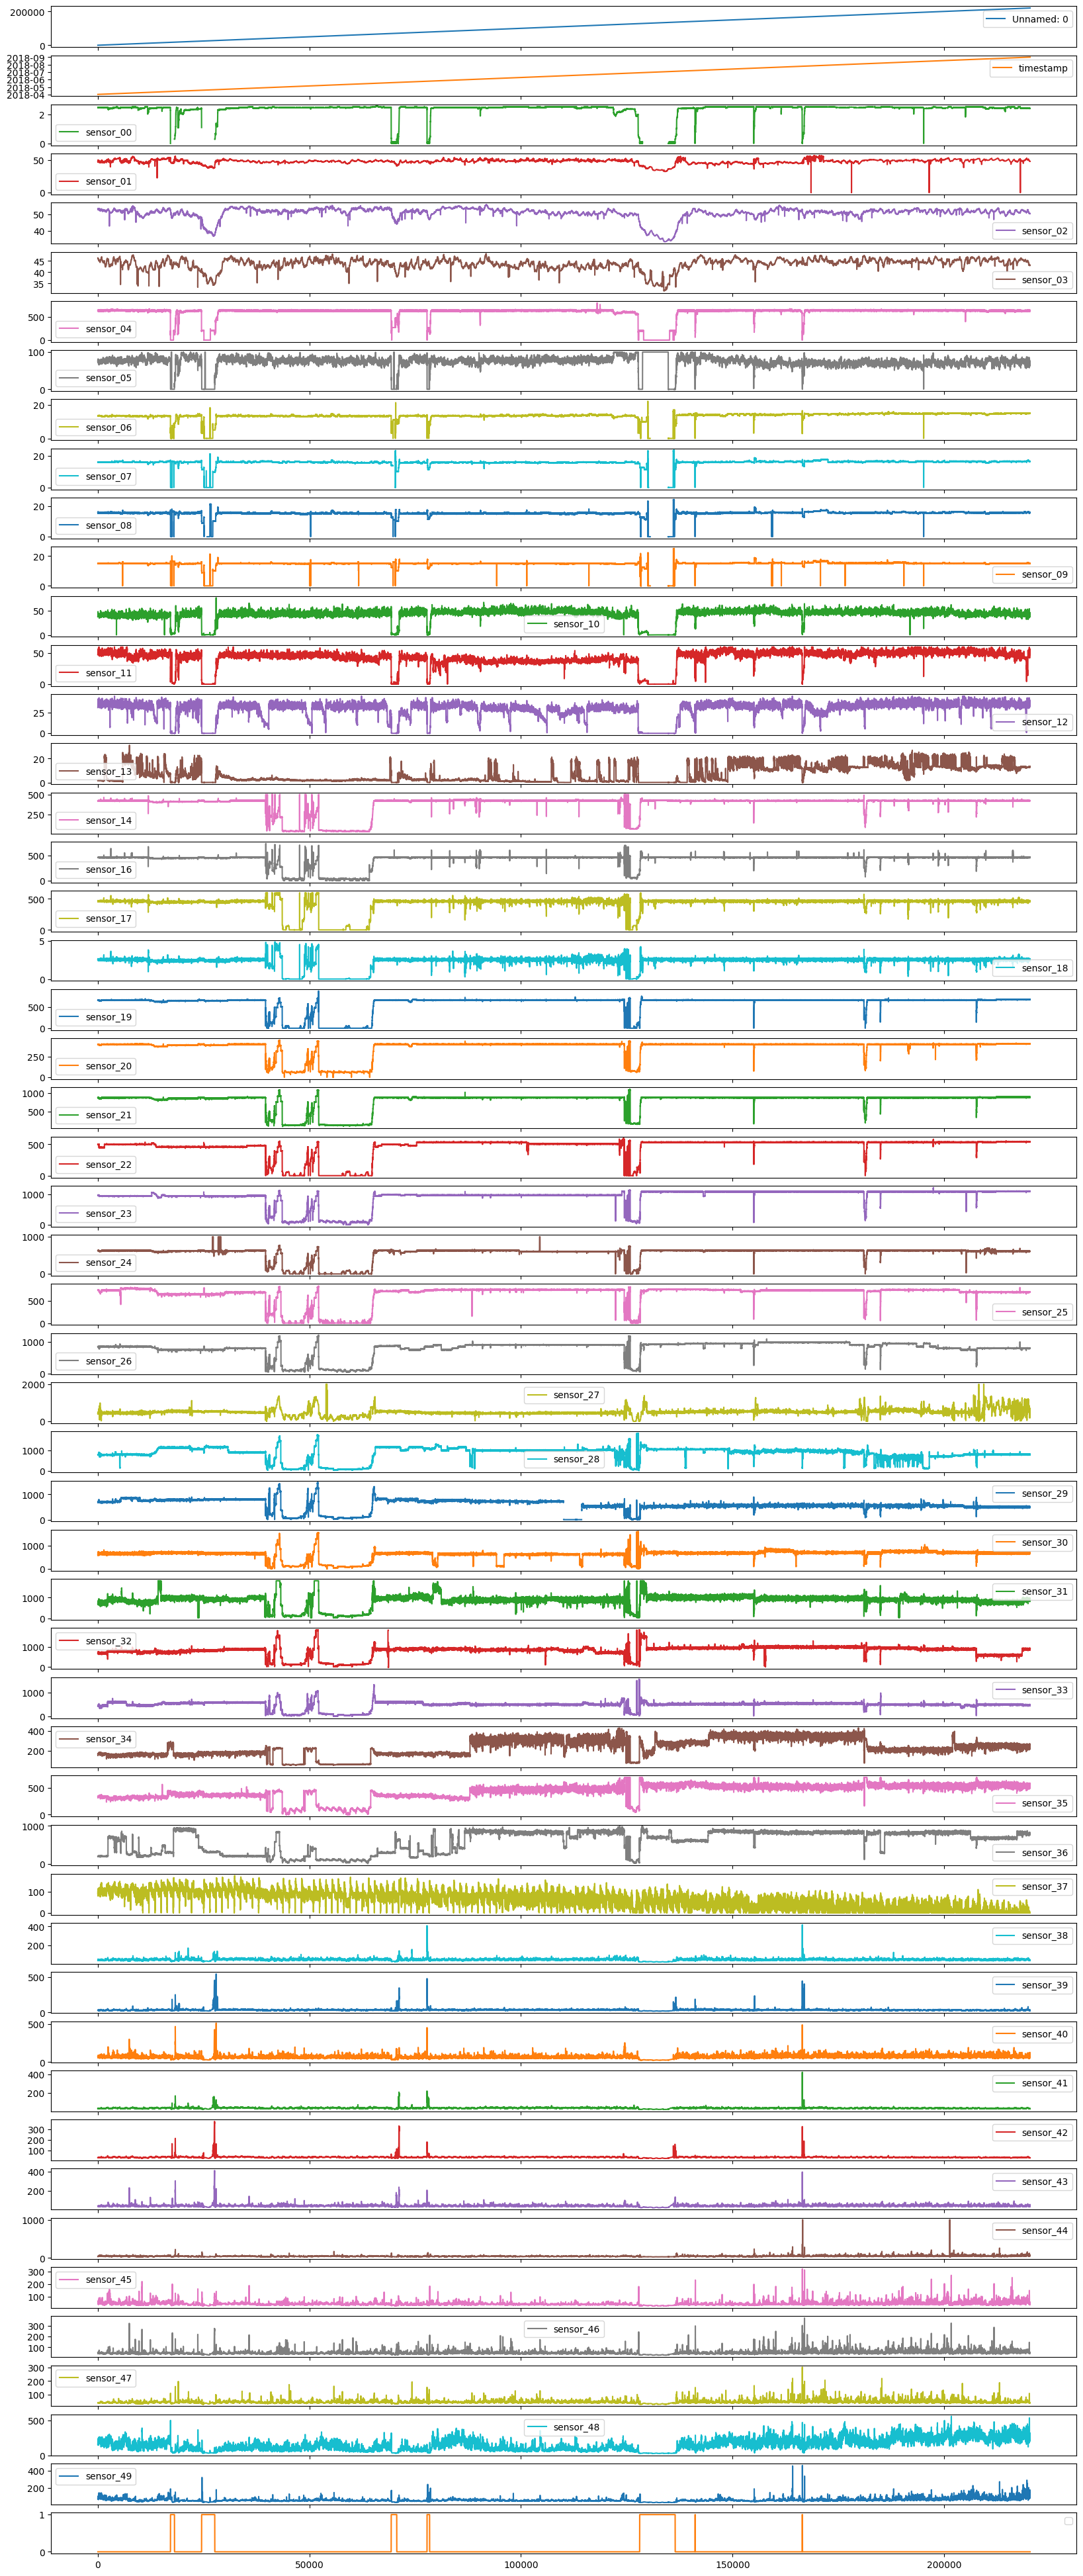

In [50]:
df.plot(subplots =True, sharex = True, figsize = (20,50))

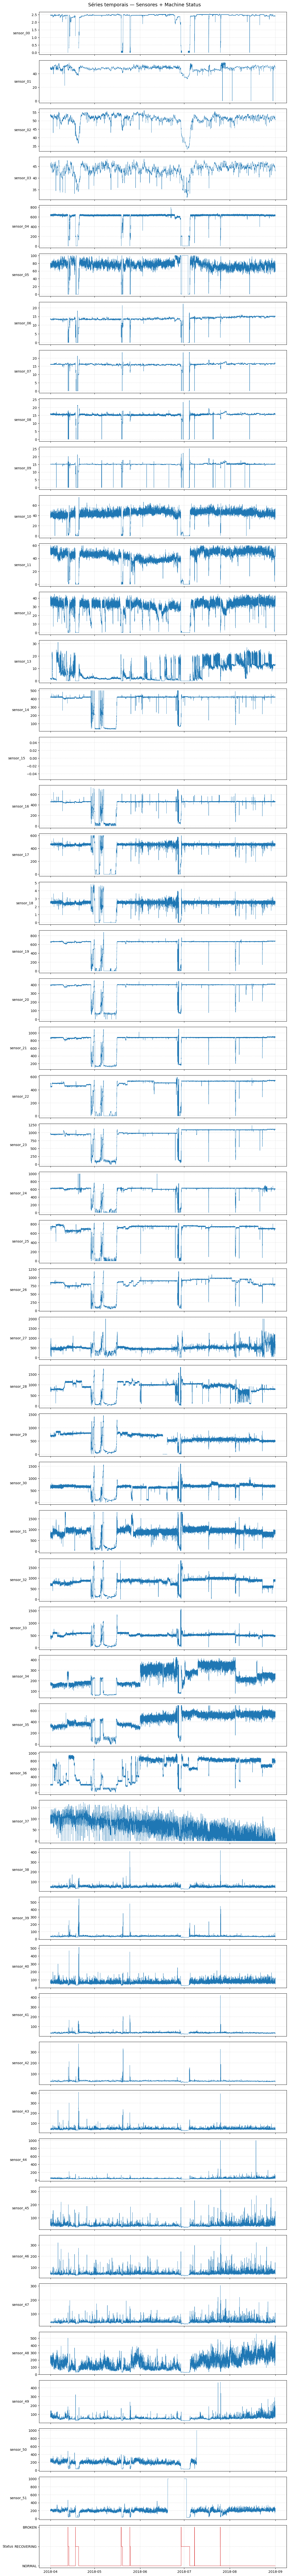

In [21]:
# --- Painel de sensores + machine_status (multi-eixo) ---

# Detecta colunas de sensores (neste dataset começam com 'sensor_')
sensor_cols_plot = [c for c in df.columns if c.startswith('sensor_')]
if not sensor_cols_plot:
    # fallback: todas numéricas exceto timestamp e label
    ignore_cols = {ts_col, label_col}
    sensor_cols_plot = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ignore_cols]

# Limita o número de sensores para visualização
MAX_SENSORS_PLOT = 60+1
sensors_to_plot = sensor_cols_plot[:MAX_SENSORS_PLOT]

n_plots = len(sensors_to_plot) + 1  # sensores + status
fig, axes = plt.subplots(n_plots, 1, figsize=(12, 2.0*n_plots), sharex=True)

# Plot sensores
for i, sensor in enumerate(sensors_to_plot):
    axes[i].plot(df[ts_col], df[sensor], linewidth=0.6, color='tab:blue')
    axes[i].set_ylabel(sensor, rotation=0, ha='right', va='center')
    axes[i].grid(True, linewidth=0.3, linestyle='--')

# Último subplot: machine_status como códigos numéricos
status_map = {'NORMAL': 0, 'RECOVERING': 1, 'BROKEN': 2}
status_numeric = df[label_col].map(status_map).fillna(-1)
axes[-1].plot(df[ts_col], status_numeric, linewidth=0.8, color='tab:red')
axes[-1].set_ylabel('Status', rotation=0, ha='right', va='center')
axes[-1].set_yticks([0, 1, 2])
axes[-1].set_yticklabels(['NORMAL', 'RECOVERING', 'BROKEN'])
axes[-1].grid(True, linewidth=0.3, linestyle='--')

fig.suptitle("Séries temporais — Sensores + Machine Status", fontsize=14, y=0.999)
plt.tight_layout()
plt.show()

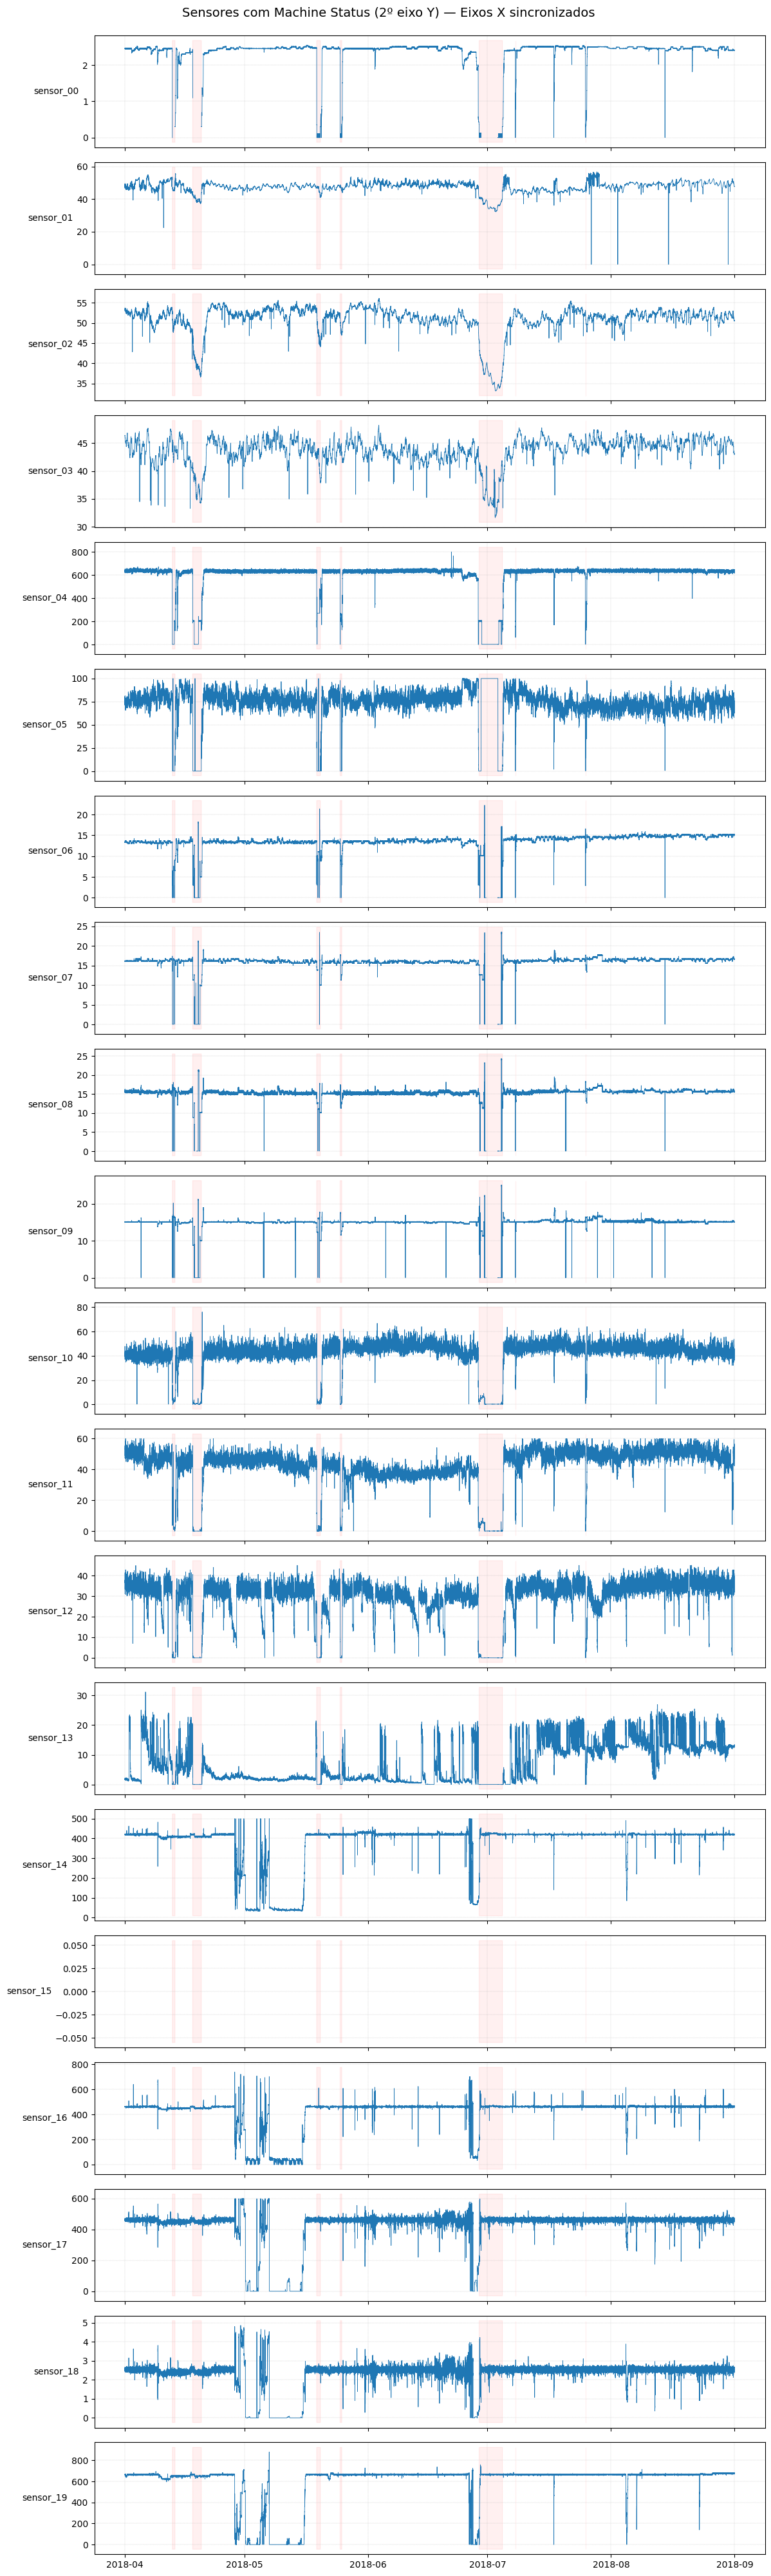

In [22]:
# --- Painel de sensores com STATUS como 2º eixo Y em cada subplot ---

# 1) Detecta colunas de sensores
sensor_cols_plot = [c for c in df.columns if c.startswith('sensor_')]
if not sensor_cols_plot:
    ignore_cols = {ts_col, label_col}
    sensor_cols_plot = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ignore_cols]

# 2) Define quantos sensores visualizar
MAX_SENSORS_PLOT = 4#20  # ajuste conforme necessário
sensors_to_plot = sensor_cols_plot[:MAX_SENSORS_PLOT]

# 3) Prepara série de status (0/1/2) para sobrepor
status_map = {'NORMAL': 0, 'RECOVERING': 1, 'BROKEN': 2}
status_numeric = df[label_col].map(status_map).fillna(-1)
ts = df[ts_col]  # eixo X compartilhado

# 4) Cria subplots (um por sensor) com sharex
n_plots = len(sensors_to_plot)
fig, axes = plt.subplots(n_plots, 1, figsize=(12, 2.0 * n_plots), sharex=True)

# Se apenas um sensor, axes não é array; normaliza
if n_plots == 1:
    axes = [axes]

for i, sensor in enumerate(sensors_to_plot):
    ax = axes[i]
    # Série do sensor (eixo Y principal)
    ax.plot(ts, df[sensor], linewidth=0.6)
    ax.set_ylabel(sensor, rotation=0, ha='right', va='center')
    ax.grid(True, linewidth=0.3, linestyle='--', alpha=0.7)
    # # Eixo Y secundário para status
    # ax2 = ax.twinx()
    # # Traça status como degrau para evidenciar mudanças de estado
    # ax2.plot(ts, status_numeric, linewidth=0.8, drawstyle='steps-post', alpha=0.7)
    # ax2.set_ylim(-0.2, 2.2)
    # ax2.set_yticks([0, 1, 2])
    # ax2.set_yticklabels(['NORMAL', 'RECOVERING', 'BROKEN'])
    # ax2.tick_params(axis='y', labelsize=8)
    # Sombreamento quando status >= 1 (RECOVERING/BROKEN) para destacar janelas anômalas
    anomalous = status_numeric >= 1
    ax.fill_between(ts, *ax.get_ylim(), where=anomalous, color='red', alpha=0.06, step='post')

fig.suptitle("Sensores com Machine Status (2º eixo Y) — Eixos X sincronizados", fontsize=14, y=0.999)
plt.tight_layout()
plt.show()


### Análise do Feature Selection

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd

# --- 0) Remover sensores com muitos NaNs ---
cols_drop_manual = [c for c in ["sensor_15", "sensor_50", "sensor_51"] if c in df.columns]
if cols_drop_manual:
    df = df.drop(columns=cols_drop_manual)
    print(f"[INFO] Removendo colunas problemáticas: {cols_drop_manual}")

# --- 1) Detectar colunas de sensores ---
sensor_cols = [c for c in df.columns if c.startswith("sensor_")]
if not sensor_cols:
    ignore_cols = {ts_col, label_col}
    sensor_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ignore_cols]

# --- 2) Limpeza: remover linhas com qualquer NaN nas features ---
df = df.replace([np.inf, -np.inf], np.nan)
mask_rows = df[sensor_cols].notna().all(axis=1) & df[label_col].notna()
df_cln = df.loc[mask_rows].copy()
print(f"[INFO] Linhas removidas: {len(df) - len(df_cln)}")

# --- 3) Split temporal ---
df_cln = df_cln.sort_values(ts_col).reset_index(drop=True)
n = len(df_cln)
split_idx = int(n * 0.8)

X_train = df_cln[sensor_cols].iloc[:split_idx]
y_train = np.where(df_cln[label_col].iloc[:split_idx].astype(str).str.upper()
                   .isin(['BROKEN', 'RECOVERING']), 1, 0)

X_test  = df_cln[sensor_cols].iloc[split_idx:]
y_test  = np.where(df_cln[label_col].iloc[split_idx:].astype(str).str.upper()
                   .isin(['BROKEN', 'RECOVERING']), 1, 0)

print(f"[Split temporal] Treino: {X_train.shape} | Teste: {X_test.shape}")

# --- 4) Feature selection supervisionada ---
# Usando RandomForest para ranking
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=sensor_cols).sort_values(ascending=False)
print("\n[Top 15 sensores mais relevantes — RandomForest]")
print(feat_importances.head(15))

# Alternativa: mutual information
mi = mutual_info_classif(X_train, y_train, discrete_features=False, random_state=42)
mi_scores = pd.Series(mi, index=sensor_cols).sort_values(ascending=False)
print("\n[Top 15 sensores mais relevantes — Mutual Information]")
print(mi_scores.head(15))

# --- 5) Seleção final das features ---
TOP_K = 20  # ajustar conforme resultado
selected_sensors = feat_importances.head(TOP_K).index.tolist()
print(f"\n[INFO] Selecionando top-{TOP_K} sensores para o PCA: {selected_sensors}")

[INFO] Removendo colunas problemáticas: ['sensor_15', 'sensor_50', 'sensor_51']
[INFO] Linhas removidas: 11535
[Split temporal] Treino: (167028, 49) | Teste: (41757, 49)

[Top 15 sensores mais relevantes — RandomForest]
sensor_00    0.159032
sensor_05    0.123656
sensor_11    0.105222
sensor_10    0.094601
sensor_12    0.076633
sensor_13    0.061000
sensor_48    0.054056
sensor_01    0.039766
sensor_04    0.034906
sensor_40    0.031108
sensor_06    0.023853
sensor_38    0.021607
sensor_49    0.020458
sensor_02    0.018689
sensor_08    0.014771
dtype: float64

[Top 15 sensores mais relevantes — Mutual Information]
sensor_00    0.102023
sensor_04    0.097401
sensor_10    0.092810
sensor_05    0.092500
sensor_11    0.092361
sensor_06    0.087645
sensor_12    0.085985
sensor_09    0.082896
sensor_07    0.081467
sensor_08    0.080303
sensor_13    0.079257
sensor_48    0.078254
sensor_49    0.072781
sensor_02    0.066446
sensor_38    0.066039
dtype: float64

[INFO] Selecionando top-20 sensor

In [42]:
import numpy as np
import pandas as pd
# selected_sensors = ['sensor_00', 'sensor_05', 'sensor_11', 'sensor_10', 'sensor_12', 'sensor_13',
#                     'sensor_48', 'sensor_01', 'sensor_04', 'sensor_40', 'sensor_06', 'sensor_38',
#                     'sensor_49', 'sensor_02', 'sensor_08', 'sensor_45', 'sensor_46', 'sensor_26',
#                     'sensor_44', 'sensor_09']
selected_sensors = ['sensor_00', 'sensor_04', 'sensor_05', 'sensor_11', 'sensor_10']

def create_sliding_window_features(df, ts_col, sensor_cols, window_size):
    df = df.sort_values(ts_col).reset_index(drop=True)
    features = []
    for start in range(len(df) - window_size + 1):
        window = df.iloc[start:start+window_size]
        feat = {}
        for col in sensor_cols:
            feat[f"{col}_mean"] = window[col].mean()
            feat[f"{col}_std"] = window[col].std()
            feat[f"{col}_min"] = window[col].min()
            feat[f"{col}_max"] = window[col].max()
            feat[f"{col}_range"] = window[col].max() - window[col].min()
        feat["timestamp"] = window[ts_col].iloc[-1]  # timestamp final da janela
        features.append(feat)
    return pd.DataFrame(features)

# Exemplo de uso
window_size = 60  # número de registros (ex: 60 min)
df_windows = create_sliding_window_features(df_cln, ts_col, selected_sensors, window_size)

In [43]:
df_windows.head()

sensor_00_mean  sensor_00_std  sensor_00_min  sensor_00_max  \
0        2.454506       0.006854       2.444734       2.466377   
1        2.454309       0.006704       2.444734       2.466377   
2        2.454113       0.006544       2.444734       2.466377   
3        2.454359       0.006463       2.444734       2.466377   
4        2.454113       0.006507       2.444734       2.466377   

   sensor_00_range  sensor_04_mean  sensor_04_std  sensor_04_min  \
0         0.021643      634.120408       5.761950         618.75   
1         0.021643      633.991165       5.842549         618.75   
2         0.021643      633.861922       5.919182         618.75   
3         0.021643      633.657447       5.954384         618.75   
4         0.021643      633.780902       5.914388         618.75   

   sensor_04_max  sensor_04_range  ...  sensor_11_std  sensor_11_min  \
0        650.463           31.713  ...       2.069049       47.52422   
1        650.463           31.713  ...       2.016691       47.52422   
2        650.463           31.713  ...       1.958480       48.17723   
3        650.463           31.713  ...       1.922596       48.65607   
4        650.463           31.713  ...       1.894773       48.89915   

   sensor_11_max  sensor_11_range  sensor_10_mean  sensor_10_std  \
0       55.50508          7.98086       41.776466       2.571105   
1       55.50508          7.98086       41.847218       2.501262   
2       55.50508          7.32785       41.917970       2.427315   
3       55.50508          6.84901       41.969798       2.371937   
4       55.50508          6.60593       41.999484       2.339717   

   sensor_10_min  sensor_10_max  sensor_10_range           timestamp  
0        37.2274       47.86315         10.63575 2018-04-01 00:59:00  
1        37.2274       47.86315         10.63575 2018-04-01 01:00:00  
2        37.3396       47.86315         10.52355 2018-04-01 01:01:00  
3        37.3396       47.86315         10.52355 2018-04-01 01:02:00  
4        37.3396       47.86315         10.52355 2018-04-01 01:03:00  

[5 rows x 26 columns]

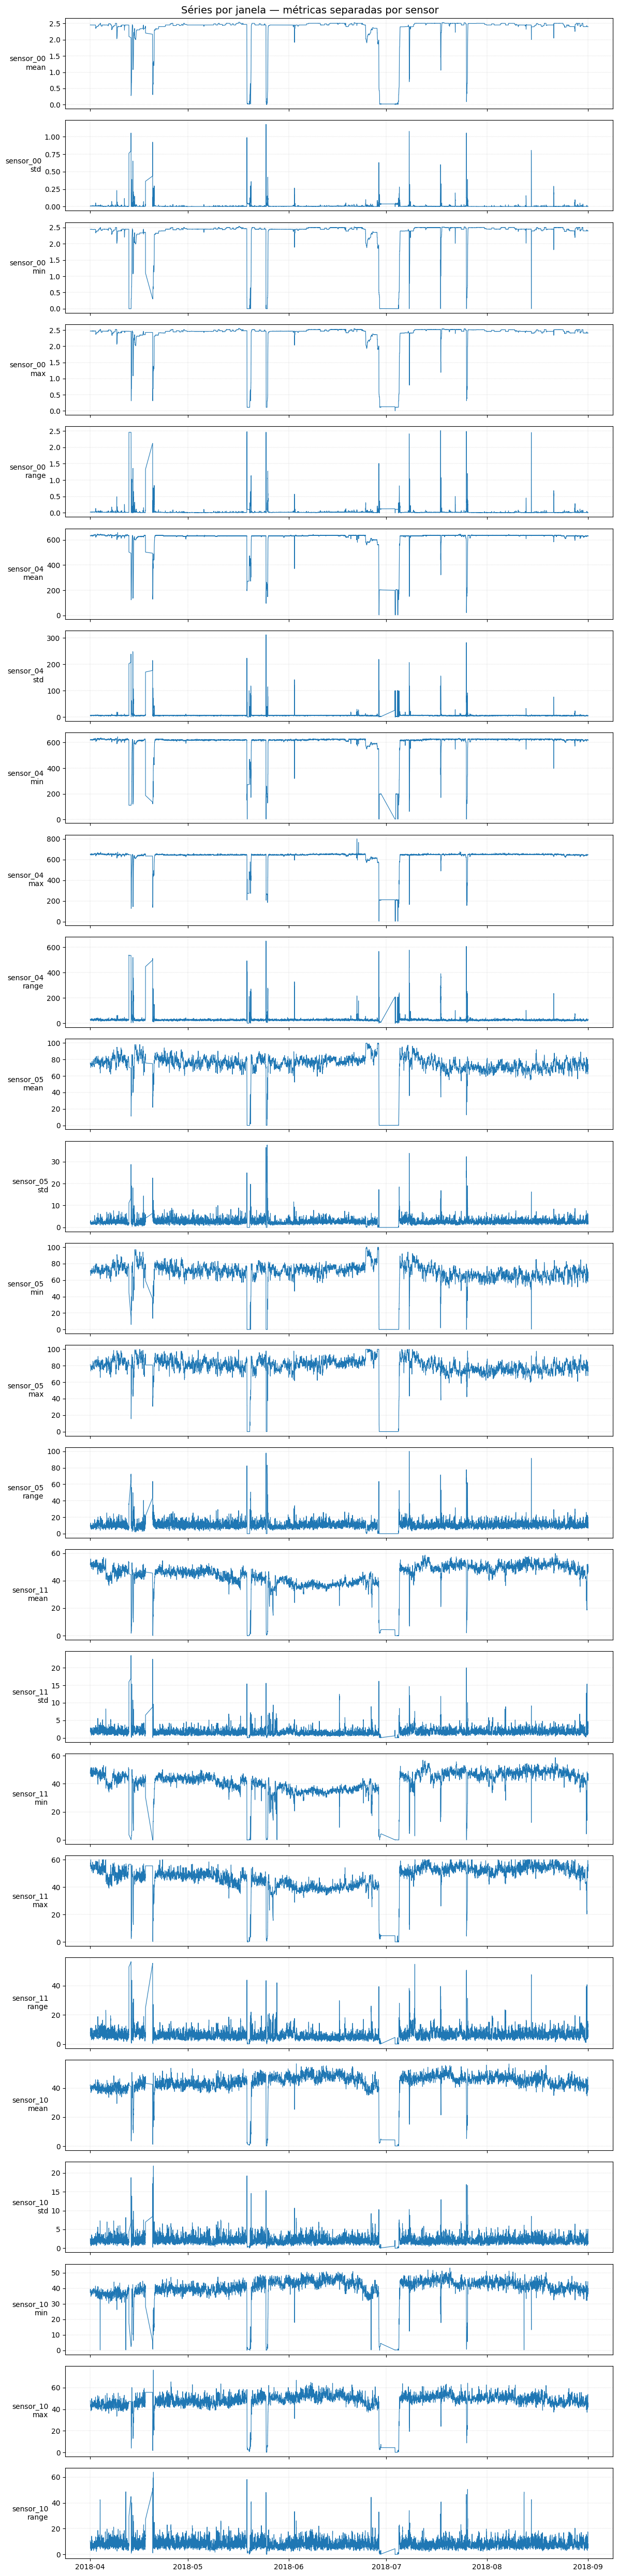

In [49]:
# --- Painel com métricas separadas (1 subplot = 1 sensor + 1 métrica) ---

import matplotlib.pyplot as plt

assert 'timestamp' in df_windows.columns, "df_windows precisa ter a coluna 'timestamp'."
ts_w = df_windows['timestamp']

MAX_SENSORS_PLOT = 5  # quantos sensores exibir
sensors_to_plot = selected_sensors[:MAX_SENSORS_PLOT]
CANDIDATE_METRICS = ["mean", "median", "std", "min", "max", "range", "slope"]

# Lista (sensor, métrica, coluna) para plotagem
plot_triplets = []
for s in sensors_to_plot:
    for m in CANDIDATE_METRICS:
        colname = f"{s}_{m}"
        if colname in df_windows.columns:
            plot_triplets.append((s, m, colname))

n_plots = len(plot_triplets)
fig, axes = plt.subplots(n_plots, 1, figsize=(12, 2.0 * n_plots), sharex=True)

if n_plots == 1:
    axes = [axes]

for i, (sensor, metric, colname) in enumerate(plot_triplets):
    ax = axes[i]
    ax.plot(ts_w, df_windows[colname], linewidth=0.8, color='tab:blue')
    ax.set_ylabel(f"{sensor}\n{metric}", rotation=0, ha='right', va='center')
    ax.grid(True, linewidth=0.3, linestyle='--', alpha=0.7)

fig.suptitle("Séries por janela — métricas separadas por sensor", fontsize=14, y=0.995)
plt.tight_layout()
plt.show()


## Análise da anomalia considerando o PCA no processo de identificação

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Preparação PCA com as top features ---
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# --- Configurações ---
selected_sensors = ['sensor_00', 'sensor_05', 'sensor_11', 'sensor_10', 'sensor_12', 'sensor_13',
                    'sensor_48', 'sensor_01', 'sensor_04', 'sensor_40', 'sensor_06', 'sensor_38',
                    'sensor_49', 'sensor_02', 'sensor_08', 'sensor_45', 'sensor_46', 'sensor_26',
                    'sensor_44', 'sensor_09']
test_size_ratio = 0.2
min_pos_ratio_test = 0.05  # garantir pelo menos 5% de positivos no teste
n_blocks = 50

# --- Prepara dataset limpo ---
X_all = df_cln[selected_sensors].copy()
y_all = np.where(df_cln[label_col].astype(str).str.upper().isin(['BROKEN','RECOVERING']), 1, 0)
ts_all = df_cln[ts_col]

# Ordena por tempo
order = np.argsort(ts_all.values)
X_all = X_all.iloc[order].reset_index(drop=True)
y_all = y_all[order]
ts_all = ts_all.iloc[order].reset_index(drop=True)

# --- Cria blocos temporais ---
block_size = int(np.ceil(len(X_all) / n_blocks))
block_ids = np.repeat(np.arange(n_blocks), block_size)[:len(X_all)]

# --- Sorteio de blocos para teste com estratificação aproximada ---
while True:
    np.random.seed(42)
    test_blocks = np.random.choice(np.arange(n_blocks),
                                   size=int(n_blocks * test_size_ratio),
                                   replace=False)
    is_test = np.isin(block_ids, test_blocks)
    y_test_candidate = y_all[is_test]
    pos_ratio = y_test_candidate.mean()
    if pos_ratio >= min_pos_ratio_test:
        break

print(f"[INFO] Proporção de positivos no teste: {pos_ratio:.2%}")

# --- Split final ---
X_train, X_test = X_all[~is_test], X_all[is_test]
y_train, y_test = y_all[~is_test], y_all[is_test]
ts_train, ts_test = ts_all[~is_test], ts_all[is_test]

print(f"[Split estratificado temporal] Treino: {X_train.shape} | Teste: {X_test.shape}")
print(f"Treino positivos: {y_train.mean():.2%} | Teste positivos: {y_test.mean():.2%}")



KeyboardInterrupt: 

In [35]:
# PCA — treino apenas com NORMAL
mask_normal = (y_train == 0)
X_fit_pca = X_train[mask_normal] if mask_normal.sum() > 0 else X_train

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_fit_s = scaler.fit_transform(X_fit_pca)

pca = PCA(n_components=0.90, svd_solver='full', random_state=42)  # 90% da variância
pca.fit(X_fit_s)

PCA(n_components=0.9, random_state=42, svd_solver='full')

* n_components=0.95

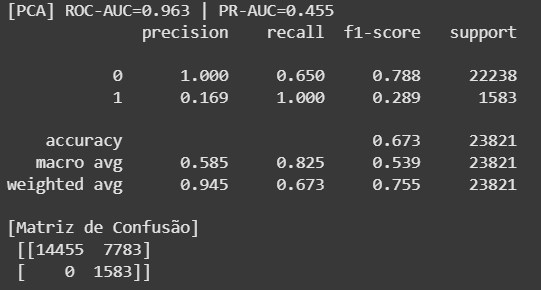

In [38]:
def reconstruction_error(X, scaler, pca):
    Xs = scaler.transform(X)
    Z  = pca.transform(Xs)
    Xr = pca.inverse_transform(Z)
    return np.mean((Xs - Xr)**2, axis=1)

def per_feature_error(X, scaler, pca):
    Xs = scaler.transform(X)
    Z  = pca.transform(Xs)
    Xr = pca.inverse_transform(Z)
    return (Xs - Xr)**2

# --- Erro e threshold otimizado ---
err_train = reconstruction_error(X_train, scaler, pca)
err_test  = reconstruction_error(X_test,  scaler, pca)

# Threshold via percentil 95 do treino NORMAL
base_errors = err_train[mask_normal] if mask_normal.sum() > 0 else err_train
thr = np.percentile(base_errors, 80)

y_pred_test = (err_test >= thr).astype(int)
auc = roc_auc_score(y_test, err_test)
ap  = average_precision_score(y_test, err_test)

print(f"[PCA] ROC-AUC={auc:.3f} | PR-AUC={ap:.3f}")
print(classification_report(y_test, y_pred_test, digits=3))
print("[Matriz de Confusão]\n", confusion_matrix(y_test, y_pred_test))

[PCA] ROC-AUC=nan | PR-AUC=0.000
              precision    recall  f1-score   support

           0      1.000     0.344     0.512     41757
           1      0.000     0.000     0.000         0

    accuracy                          0.344     41757
   macro avg      0.500     0.172     0.256     41757
weighted avg      1.000     0.344     0.512     41757

[Matriz de Confusão]
 [[14367 27390]
 [    0     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/loc

In [39]:
# --- Ranking de sensores mais ligados às anomalias ---
err_feat_test = per_feature_error(X_test, scaler, pca)
err_feat_df   = pd.DataFrame(err_feat_test, columns=selected_sensors, index=X_test.index)

top_k = max(1, int(0.01 * len(err_test)))  # top 1% amostras mais anômalas
top_idx = np.argsort(err_test)[-top_k:]
mean_err_per_feat = err_feat_df.iloc[top_idx].mean().sort_values(ascending=False)

print("\n[Top features que mais contribuíram para anomalias no teste]")
print(mean_err_per_feat.head(15))


[Top features que mais contribuíram para anomalias no teste]
sensor_49    13.408612
sensor_11     8.103331
sensor_44     5.215642
sensor_45     4.932767
sensor_46     4.747281
sensor_06     3.795621
sensor_48     3.332127
sensor_13     1.912723
sensor_09     1.762657
sensor_08     1.730410
sensor_10     0.826780
sensor_26     0.724592
sensor_02     0.479738
sensor_04     0.478534
sensor_00     0.343964
dtype: float64


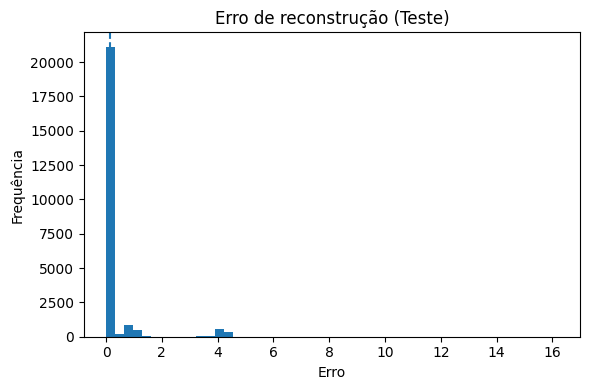

In [15]:
# 7) Visual do erro no teste
plt.figure(figsize=(6,4))
plt.hist(err_test, bins=50)
plt.axvline(thr, linestyle='--')
plt.title('Erro de reconstrução (Teste)')
plt.xlabel('Erro'); plt.ylabel('Frequência')
plt.tight_layout(); plt.show()

In [16]:
# 8) Causas prováveis: ranking das features pelo erro médio no top 1% anômalo
err_feat_test = per_feature_error(X_test, scaler, pca)
err_feat_df   = pd.DataFrame(err_feat_test, columns=sensor_cols, index=X_test.index)

top_k = max(1, int(0.01 * len(err_test)))  # top 1% das amostras com maior erro
top_idx = np.argsort(err_test)[-top_k:]
mean_err_per_feat = err_feat_df.iloc[top_idx].mean().sort_values(ascending=False)

print("\n[Top features que mais contribuíram para anomalias no teste]")
print(mean_err_per_feat.head(15))




[Top features que mais contribuíram para anomalias no teste]
sensor_51    73.332230
sensor_49    37.266081
sensor_08    19.670958
sensor_09    18.454512
sensor_07    18.195456
sensor_10    13.198249
sensor_06    10.557404
sensor_44     9.804630
sensor_11     7.157957
sensor_03     6.902611
sensor_39     6.347246
sensor_50     6.225609
sensor_00     5.153671
sensor_46     3.673952
sensor_04     3.594954
dtype: float64


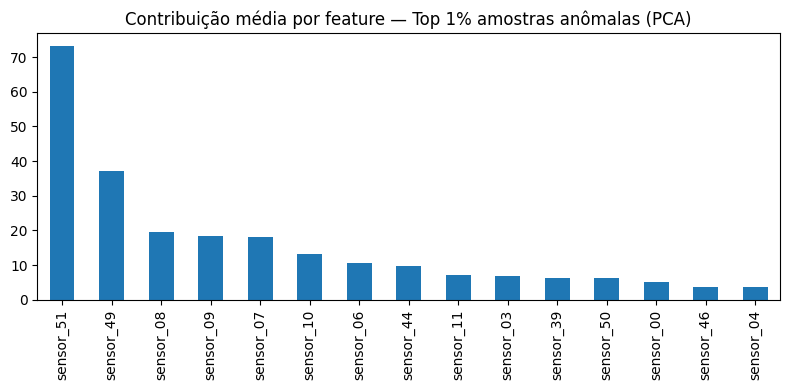

In [17]:
plt.figure(figsize=(8,4))
mean_err_per_feat.head(15).plot(kind='bar')
plt.title('Contribuição média por feature — Top 1% amostras anômalas (PCA)')
plt.tight_layout(); plt.show()